In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['fivethirtyeight'])
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})


from time import gmtime

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print('Train R2:' + str(round(r2(train_true_values, train_pred_values), 3)))
    print('Test R2:' + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

In [3]:
DATASET_TRAIN_PATH = 'C:/Users/dmitriy.ivanov/Downloads/Kurs_project_task/train.csv'
DATASET_PREPARED_TRAIN_PATH = 'C:/Users/dmitriy.ivanov/Downloads/Kurs_project_task/train_prepared.csv'

DATASET_TEST_PATH = 'C:/Users/dmitriy.ivanov/Downloads/Kurs_project_task/test.csv'
DATASET_PREPARED_TEST_PATH = 'datasets/test_prepared.csv'

DATASET_ANSWERED_PATH = '../DmitriyIvanov_pred.csv'

In [4]:
train_df = pd.read_csv(DATASET_TRAIN_PATH)

In [5]:
test_df = pd.read_csv(DATASET_TEST_PATH)

In [6]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
import seaborn as sns

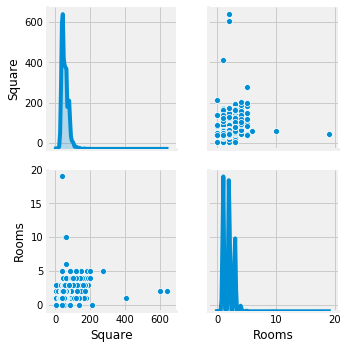

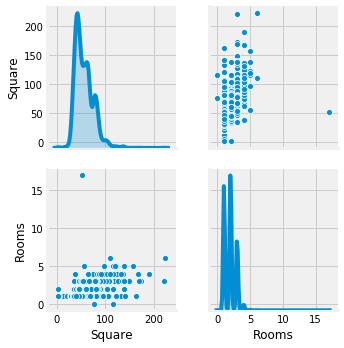

In [8]:
sns.pairplot(train_df[{'Square','Rooms'}], diag_kind='kde');
sns.pairplot(test_df[{'Square','Rooms'}], diag_kind='kde');

In [9]:
train_df['Rooms'] = train_df['Rooms'].astype(int)
train_df['HouseFloor'] = train_df['HouseFloor'].astype(int)
train_df['Floor'] = train_df['Floor'].astype(int)
train_df['Id'] = train_df['Id'].astype(int)
train_df['DistrictId'] = train_df['DistrictId'].astype(int)
train_df['HouseYear'] = train_df['HouseYear'].astype(int)


test_df['Rooms'] = test_df['Rooms'].astype(int)
test_df['HouseFloor'] = test_df['HouseFloor'].astype(int)
test_df['Floor'] = test_df['Floor'].astype(int)
test_df['Id'] = test_df['Id'].astype(int)
test_df['DistrictId'] = test_df['DistrictId'].astype(int)
test_df['HouseYear'] = test_df['HouseYear'].astype(int)

In [10]:
train_df_num_features = train_df.select_dtypes(include=['float64', 'int64'])

In [11]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()

In [12]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()

In [13]:
filter1 = train_df.loc[~((train_df['Rooms'] == 0) | (train_df['Rooms'] > 6)) ,{'DistrictId','HouseYear','Rooms'}]
filter1 = filter1.groupby(['DistrictId','HouseYear']).median()
a = train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] > 6),{'DistrictId','HouseYear','Rooms'}]
b = pd.merge(a, filter1, on=['DistrictId','HouseYear'],how='left')


filter1 = test_df.loc[~((test_df['Rooms'] == 0) | (test_df['Rooms'] > 6)) ,{'DistrictId','HouseYear','Rooms'}]
filter1 = filter1.groupby(['DistrictId','HouseYear']).median()
aa = test_df.loc[(test_df['Rooms'] == 0) | (test_df['Rooms'] > 6),{'DistrictId','HouseYear','Rooms'}]
bb = pd.merge(a, filter1, on=['DistrictId','HouseYear'],how='left')

In [14]:
train_df.loc[(train_df['Rooms'] == 0) | (train_df['Rooms'] >= 6), 'Rooms'] =\
b['Rooms_y'].median()


test_df.loc[(test_df['Rooms'] == 0) | (test_df['Rooms'] >= 6), 'Rooms'] =\
bb['Rooms_y'].median()

In [15]:
#train_df.loc[(train_df['Square'] > train_df['Square'].quantile(.995)),'Square'] = train_df['Square'].quantile(.75)
#train_df.loc[(train_df['Square'] < train_df['Square'].quantile(.005)),'Square'] = train_df['Square'].median()

In [16]:
#test_df.loc[(test_df['Square'] > test_df['Square'].quantile(.995)),'Square'] = test_df['Square'].quantile(.75)
#test_df.loc[(test_df['Square'] < test_df['Square'].quantile(.005)),'Square'] = test_df['Square'].median()

In [17]:
med_sq_1_room = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['Square'].isnull()),'Square'].median()
med_sq_2_room = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['Square'].isnull()),'Square'].median()
med_sq_3_room = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['Square'].isnull()),'Square'].median()
med_sq_4_room = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['Square'].isnull()),'Square'].median()
med_sq_5_room = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['Square'].isnull()),'Square'].median()
sq_min_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['Square'].isnull()),'Square'].quantile(.05)
sq_max_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['Square'].isnull()),'Square'].quantile(.95)
sq_min_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['Square'].isnull()),'Square'].quantile(.05)
sq_max_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['Square'].isnull()),'Square'].quantile(.95)
sq_min_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['Square'].isnull()),'Square'].quantile(.05)
sq_max_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['Square'].isnull()),'Square'].quantile(.95)
sq_min_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['Square'].isnull()),'Square'].quantile(.05)
sq_max_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['Square'].isnull()),'Square'].quantile(.95)
sq_min_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['Square'].isnull()),'Square'].quantile(.05)
sq_max_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['Square'].isnull()),'Square'].quantile(.95)
tmed_sq_1_room = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['Square'].isnull()),'Square'].median()
tmed_sq_2_room = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['Square'].isnull()),'Square'].median()
tmed_sq_3_room = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['Square'].isnull()),'Square'].median()
tmed_sq_4_room = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['Square'].isnull()),'Square'].median()
tmed_sq_5_room = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['Square'].isnull()),'Square'].median()
tsq_min_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['Square'].isnull()),'Square'].quantile(.05)
tsq_max_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['Square'].isnull()),'Square'].quantile(.95)
tsq_min_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['Square'].isnull()),'Square'].quantile(.05)
tsq_max_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['Square'].isnull()),'Square'].quantile(.95)
tsq_min_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['Square'].isnull()),'Square'].quantile(.05)
tsq_max_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['Square'].isnull()),'Square'].quantile(.95)
tsq_min_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['Square'].isnull()),'Square'].quantile(.05)
tsq_max_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['Square'].isnull()),'Square'].quantile(.95)
tsq_min_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['Square'].isnull()),'Square'].quantile(.05)
tsq_max_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['Square'].isnull()),'Square'].quantile(.95)

In [18]:
train_df.loc[((train_df['Square'] > sq_max_1) | (train_df['Square'] < sq_min_1))&(train_df['Rooms'] == 1)&(train_df['Square'] < sq_max_1 - sq_min_1),'Square'] =  med_sq_1_room
test_df.loc[((test_df['Square'] > sq_max_1) | (test_df['Square'] < sq_min_1))&(test_df['Rooms'] == 1)&(test_df['Square'] < sq_max_1 - sq_min_1),'Square'] =  med_sq_1_room
train_df.loc[((train_df['Square'] > sq_max_1) | (train_df['Square'] < sq_min_1))&(train_df['Rooms'] == 1)&(train_df['Square'] > med_sq_1_room + sq_max_1-sq_min_1),'Square'] =  med_sq_1_room
test_df.loc[((test_df['Square'] > sq_max_1) | (test_df['Square'] < sq_min_1))&(test_df['Rooms'] == 1)&(test_df['Square'] > med_sq_1_room + sq_max_1-sq_min_1),'Square'] =  med_sq_1_room

In [19]:
train_df.loc[((train_df['Square'] > sq_max_2) | (train_df['Square'] < sq_min_2))&(train_df['Rooms'] == 2)&(train_df['Square'] < sq_max_2 - sq_min_2),'Square'] =  med_sq_2_room
test_df.loc[((test_df['Square'] > sq_max_2) | (test_df['Square'] < sq_min_2))&(test_df['Rooms'] == 2)&(test_df['Square'] < sq_max_2 - sq_min_2),'Square'] =  med_sq_2_room
train_df.loc[((train_df['Square'] > sq_max_2) | (train_df['Square'] < sq_min_2))&(train_df['Rooms'] == 2)&(train_df['Square'] > med_sq_2_room + sq_max_2-sq_min_2),'Square'] =  med_sq_2_room
test_df.loc[((test_df['Square'] > sq_max_2) | (test_df['Square'] < sq_min_2))&(test_df['Rooms'] == 2)&(test_df['Square'] > med_sq_2_room + sq_max_2-sq_min_2),'Square'] =  med_sq_2_room

In [20]:
train_df.loc[((train_df['Square'] > sq_max_3) | (train_df['Square'] < sq_min_3))&(train_df['Rooms'] == 3)&(train_df['Square'] < sq_max_3 - sq_min_3),'Square'] =  med_sq_3_room
test_df.loc[((test_df['Square'] > sq_max_3) | (test_df['Square'] < sq_min_3))&(test_df['Rooms'] == 3)&(test_df['Square'] < sq_max_3 - sq_min_3),'Square'] =  med_sq_3_room
train_df.loc[((train_df['Square'] > sq_max_3) | (train_df['Square'] < sq_min_3))&(train_df['Rooms'] == 3)&(train_df['Square'] > med_sq_3_room + sq_max_3-sq_min_3),'Square'] =  med_sq_3_room
test_df.loc[((test_df['Square'] > sq_max_3) | (test_df['Square'] < sq_min_3))&(test_df['Rooms'] == 3)&(test_df['Square'] > med_sq_3_room + sq_max_3-sq_min_3),'Square'] =  med_sq_3_room

In [21]:
train_df.loc[((train_df['Square'] > sq_max_4) | (train_df['Square'] < sq_min_4))&(train_df['Rooms'] == 4)&(train_df['Square'] < sq_max_4 - sq_min_4),'Square'] =  med_sq_4_room
test_df.loc[((test_df['Square'] > sq_max_4) | (test_df['Square'] < sq_min_4))&(test_df['Rooms'] == 4)&(test_df['Square'] < sq_max_4 - sq_min_4),'Square'] =  med_sq_4_room
train_df.loc[((train_df['Square'] > sq_max_4) | (train_df['Square'] < sq_min_4))&(train_df['Rooms'] == 4)&(train_df['Square'] > med_sq_4_room + sq_max_4-sq_min_4),'Square'] =  med_sq_4_room
test_df.loc[((test_df['Square'] > sq_max_4) | (test_df['Square'] < sq_min_4))&(test_df['Rooms'] == 4)&(test_df['Square'] > med_sq_4_room + sq_max_4-sq_min_4),'Square'] =  med_sq_4_room

In [22]:
train_df.loc[((train_df['Square'] > sq_max_5) | (train_df['Square'] < sq_min_5))&(train_df['Rooms'] == 5)&(train_df['Square'] < sq_max_5 - sq_min_5),'Square'] =  med_sq_5_room
test_df.loc[((test_df['Square'] > sq_max_5) | (test_df['Square'] < sq_min_5))&(test_df['Rooms'] == 5)&(test_df['Square'] < sq_max_5 - sq_min_5),'Square'] =  med_sq_5_room
train_df.loc[((train_df['Square'] > sq_max_5) | (train_df['Square'] < sq_min_5))&(train_df['Rooms'] == 5)&(train_df['Square'] > med_sq_5_room + sq_max_5-sq_min_5),'Square'] =  med_sq_5_room
test_df.loc[((test_df['Square'] > sq_max_5) | (test_df['Square'] < sq_min_5))&(test_df['Rooms'] == 5)&(test_df['Square'] > med_sq_5_room + sq_max_5-sq_min_5),'Square'] =  med_sq_5_room

In [23]:
#train_df.loc[(train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.995)),'LifeSquare'] =\
#train_df['LifeSquare'].quantile(.75)
#train_df.loc[(train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.005)),'LifeSquare'] =\
#train_df['LifeSquare'].median()

In [24]:
#test_df.loc[(test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.995)),'LifeSquare'] =\
#test_df['LifeSquare'].quantile(.75)
#test_df.loc[(test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.005)),'LifeSquare'] =\
#test_df['LifeSquare'].median()

In [25]:
med_sq_1_room = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].median()
med_sq_2_room = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].median()
med_sq_3_room = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].median()
med_sq_4_room = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].median()
med_sq_5_room = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].median()

sq_min_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
sq_max_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)

sq_min_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
sq_max_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)
sq_min_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
sq_max_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.9)
sq_min_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
sq_max_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.9)
sq_min_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
sq_max_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)

tmed_sq_1_room = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].median()
tmed_sq_2_room = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].median()
tmed_sq_3_room = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].median()
tmed_sq_4_room = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].median()
tmed_sq_5_room = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].median()

tsq_min_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
tsq_max_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)
tsq_min_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
tsq_max_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)
tsq_min_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
tsq_max_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.9)
tsq_min_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
tsq_max_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.9)
tsq_min_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.05)
tsq_max_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['LifeSquare'].isnull()),'LifeSquare'].quantile(.95)

In [26]:
# Вычисление медианной разницы между площадью квартиры и жилой для 1 комнаты

sq1_diff = ((train_df.loc[(train_df['Rooms'] == 1)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 1)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.05))/2)-\
((train_df.loc[(train_df['Rooms'] == 1)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 1)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.05))/2)

train_df.loc[
    (
        (train_df['LifeSquare']>sq_max_1)|\
        (train_df['LifeSquare']<sq_min_1)|\
        (train_df['LifeSquare']>train_df['Square'])
    )
        &(train_df['Rooms']==1)
    ,'LifeSquare'] = train_df['Square']-sq1_diff

In [27]:
# Вычисление медианной разницы между площадью квартиры и жилой для 2 комнат

sq2_diff = ((train_df.loc[(train_df['Rooms'] == 2)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 2)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.05))/2)-\
((train_df.loc[(train_df['Rooms'] == 2)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 2)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.05))/2)

train_df.loc[
    (
        (train_df['LifeSquare']>sq_max_2)|\
        (train_df['LifeSquare']<sq_min_2)|\
        (train_df['LifeSquare']>train_df['Square'])
    )
        &(train_df['Rooms']==2)
    ,'LifeSquare'] = train_df['Square']-sq2_diff

In [28]:
# Вычисление медианной разницы между площадью квартиры и жилой для 3 комнат

sq3_diff = ((train_df.loc[(train_df['Rooms'] == 3)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 3)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.05))/3)-\
((train_df.loc[(train_df['Rooms'] == 3)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 3)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.05))/3)

train_df.loc[
    (
        (train_df['LifeSquare']>sq_max_3)|\
        (train_df['LifeSquare']<sq_min_3)|\
        (train_df['LifeSquare']>train_df['Square'])
    )
        &(train_df['Rooms']==3)
    ,'LifeSquare'] = train_df['Square']-sq3_diff

In [29]:
# Вычисление медианной разницы между площадью квартиры и жилой для 4 комнат

sq4_diff = ((train_df.loc[(train_df['Rooms'] == 4)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 4)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.05))/4)-\
((train_df.loc[(train_df['Rooms'] == 4)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 4)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.05))/4)

train_df.loc[
    (
        (train_df['LifeSquare']>sq_max_4)|\
        (train_df['LifeSquare']<sq_min_4)|\
        (train_df['LifeSquare']>train_df['Square'])
    )
        &(train_df['Rooms']==4)
    ,'LifeSquare'] = train_df['Square']-sq4_diff

In [30]:
# Вычисление медианной разницы между площадью квартиры и жилой для 5 комнат

sq5_diff = ((train_df.loc[(train_df['Rooms'] == 5)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 5)&(~train_df['Square'].isnull())&(train_df['Square']>train_df['LifeSquare']),'Square'].quantile(.05))/5)-\
((train_df.loc[(train_df['Rooms'] == 5)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
train_df.loc[(train_df['Rooms'] == 5)&(~train_df['LifeSquare'].isnull())&(train_df['Square']>train_df['LifeSquare']),'LifeSquare'].quantile(.05))/5)

train_df.loc[
    (
        (train_df['LifeSquare']>sq_max_5)|\
        (train_df['LifeSquare']<sq_min_5)|\
        (train_df['LifeSquare']>train_df['Square'])
    )
        &(train_df['Rooms']==5)
    ,'LifeSquare'] = train_df['Square']-sq5_diff

In [31]:
# Вычисление медианной разницы между площадью квартиры и жилой для 1 комнаты

sq1_diff = ((test_df.loc[(test_df['Rooms'] == 1)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 1)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.05))/2)-\
((test_df.loc[(test_df['Rooms'] == 1)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 1)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.05))/2)

test_df.loc[
    (
        (test_df['LifeSquare']>sq_max_1)|\
        (test_df['LifeSquare']<sq_min_1)|\
        (test_df['LifeSquare']>test_df['Square'])
    )
        &(test_df['Rooms']==1)
    ,'LifeSquare'] = test_df['Square']-sq1_diff

In [32]:
# Вычисление медианной разницы между площадью квартиры и жилой для 2 комнат

sq2_diff = ((test_df.loc[(test_df['Rooms'] == 2)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 2)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.05))/2)-\
((test_df.loc[(test_df['Rooms'] == 2)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 2)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.05))/2)

test_df.loc[
    (
        (test_df['LifeSquare']>sq_max_2)|\
        (test_df['LifeSquare']<sq_min_2)|\
        (test_df['LifeSquare']>test_df['Square'])
    )
        &(test_df['Rooms']==2)
    ,'LifeSquare'] = test_df['Square']-sq2_diff

In [33]:
# Вычисление медианной разницы между площадью квартиры и жилой для 3 комнат

sq3_diff = ((test_df.loc[(test_df['Rooms'] == 3)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 3)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.05))/3)-\
((test_df.loc[(test_df['Rooms'] == 3)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 3)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.05))/3)

test_df.loc[
    (
        (test_df['LifeSquare']>sq_max_3)|\
        (test_df['LifeSquare']<sq_min_3)|\
        (test_df['LifeSquare']>test_df['Square'])
    )
        &(test_df['Rooms']==3)
    ,'LifeSquare'] = test_df['Square']-sq3_diff

In [34]:
# Вычисление медианной разницы между площадью квартиры и жилой для 4 комнат

sq4_diff = ((test_df.loc[(test_df['Rooms'] == 4)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 4)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.05))/4)-\
((test_df.loc[(test_df['Rooms'] == 4)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 4)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.05))/4)

test_df.loc[
    (
        (test_df['LifeSquare']>sq_max_4)|\
        (test_df['LifeSquare']<sq_min_4)|\
        (test_df['LifeSquare']>test_df['Square'])
    )
        &(test_df['Rooms']==4)
    ,'LifeSquare'] = test_df['Square']-sq4_diff

In [35]:
# Вычисление медианной разницы между площадью квартиры и жилой для 5 комнат

sq5_diff = ((test_df.loc[(test_df['Rooms'] == 5)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 5)&(~test_df['Square'].isnull())&(test_df['Square']>test_df['LifeSquare']),'Square'].quantile(.05))/5)-\
((test_df.loc[(test_df['Rooms'] == 5)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.95)+\
test_df.loc[(test_df['Rooms'] == 5)&(~test_df['LifeSquare'].isnull())&(test_df['Square']>test_df['LifeSquare']),'LifeSquare'].quantile(.05))/5)

test_df.loc[
    (
        (test_df['LifeSquare']>sq_max_5)|\
        (test_df['LifeSquare']<sq_min_5)|\
        (test_df['LifeSquare']>test_df['Square'])
    )
        &(test_df['Rooms']==5)
    ,'LifeSquare'] = test_df['Square']-sq5_diff

In [36]:
#train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
#train_df.loc[(train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.995)),'KitchenSquare'] =\
#train_df['KitchenSquare'].median()

In [37]:
#test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
#test_df.loc[(test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.995)),'KitchenSquare'] =\
#test_df['KitchenSquare'].median()

In [38]:
med_sq_1_room = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
med_sq_2_room = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
med_sq_3_room = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
med_sq_4_room = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
med_sq_5_room = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
sq_min_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
sq_max_1 = train_df.loc[(train_df['Rooms'] == 1)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
sq_min_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
sq_max_2 = train_df.loc[(train_df['Rooms'] == 2)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
sq_min_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
sq_max_3 = train_df.loc[(train_df['Rooms'] == 3)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
sq_min_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
sq_max_4 = train_df.loc[(train_df['Rooms'] == 4)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
sq_min_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.5)
sq_max_5 = train_df.loc[(train_df['Rooms'] == 5)&(~train_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)

tmed_sq_1_room = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
tmed_sq_2_room = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
tmed_sq_3_room = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
tmed_sq_4_room = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
tmed_sq_5_room = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].median()
tsq_min_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
tsq_max_1 = test_df.loc[(test_df['Rooms'] == 1)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
tsq_min_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
tsq_max_2 = test_df.loc[(test_df['Rooms'] == 2)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
tsq_min_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
tsq_max_3 = test_df.loc[(test_df['Rooms'] == 3)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
tsq_min_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.37)
tsq_max_4 = test_df.loc[(test_df['Rooms'] == 4)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)
tsq_min_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.5)
tsq_max_5 = test_df.loc[(test_df['Rooms'] == 5)&(~test_df['KitchenSquare'].isnull()),'KitchenSquare'].quantile(.95)

In [39]:
train_df.loc[((train_df['KitchenSquare'] > sq_max_1) | (train_df['KitchenSquare'] < sq_min_1) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (train_df['Rooms'] == 1)&\
             (train_df['KitchenSquare'] > med_sq_1_room)
             ,'KitchenSquare'] = med_sq_1_room

test_df.loc[((test_df['KitchenSquare'] > tsq_max_1) | (test_df['KitchenSquare'] < tsq_min_1) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (test_df['Rooms'] == 1)&\
             (test_df['KitchenSquare'] > tmed_sq_1_room)
             ,'KitchenSquare'] = tmed_sq_1_room

train_df.loc[((train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (train_df['Rooms'] == 2)&\
             (train_df['KitchenSquare'] > med_sq_2_room)
             ,'KitchenSquare'] = med_sq_2_room

test_df.loc[((test_df['KitchenSquare'] > sq_max_2) | (test_df['KitchenSquare'] < sq_min_1) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (test_df['Rooms'] == 2)&\
             (test_df['KitchenSquare'] > med_sq_2_room)
             ,'KitchenSquare'] = med_sq_2_room

train_df.loc[((train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (train_df['Rooms'] == 3)&\
             (train_df['KitchenSquare'] > med_sq_3_room)
             ,'KitchenSquare'] = med_sq_3_room

test_df.loc[((test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (test_df['Rooms'] == 3)&\
             (test_df['KitchenSquare'] > tmed_sq_3_room)
             ,'KitchenSquare'] = tmed_sq_3_room

train_df.loc[((train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (train_df['Rooms'] == 4)&\
             (train_df['KitchenSquare'] > med_sq_4_room)
             ,'KitchenSquare'] = med_sq_4_room

test_df.loc[((test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (test_df['Rooms'] == 4)&\
             (test_df['KitchenSquare'] > tmed_sq_4_room)
             ,'KitchenSquare'] = tmed_sq_4_room

train_df.loc[((train_df['KitchenSquare'] > train_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (train_df['Rooms'] == 5)&\
             (train_df['KitchenSquare'] > med_sq_5_room)
             ,'KitchenSquare'] = med_sq_5_room

test_df.loc[((test_df['KitchenSquare'] > test_df['KitchenSquare'].quantile(.95)) | (train_df['KitchenSquare']> train_df['LifeSquare']))&\
             (test_df['Rooms'] == 5)&\
             (test_df['KitchenSquare'] > tmed_sq_5_room)
             ,'KitchenSquare'] = tmed_sq_5_room

In [40]:
train_df.loc[
    (train_df['HouseFloor'] == 0) |
    (train_df['HouseFloor'] > 24),
    'HouseFloor'
] = train_df['HouseFloor'].median()

In [41]:
test_df.loc[
    (test_df['HouseFloor'] == 0) |
    (test_df['HouseFloor'] > 24),
    'HouseFloor'
] = test_df['HouseFloor'].median()

In [42]:
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [43]:
test_floor_outliers = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index
test_df.loc[test_floor_outliers, 'Floor'] = test_df.loc[test_floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [44]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [45]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [46]:
train_df['S1'] = scaler.fit_transform(train_df[{'Social_1'}])
test_df['S1'] = scaler.fit_transform(test_df[{'Social_1'}])
train_df['S2'] = scaler.fit_transform(train_df[{'Social_2'}])
test_df['S2'] = scaler.fit_transform(test_df[{'Social_2'}])
train_df['S3'] = scaler.fit_transform(train_df[{'Social_3'}])
test_df['S3'] = scaler.fit_transform(test_df[{'Social_3'}])
train_df['E1'] = scaler.fit_transform(train_df[{'Ecology_1'}])
test_df['E1'] = scaler.fit_transform(test_df[{'Ecology_1'}])

In [47]:
feature_names = [
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Healthcare_1',
 'Helthcare_2'
]
new_feature_names = ['S2','S1','S3','E1']
target_name = 'Price'

In [48]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [49]:
X_validate = test_df[feature_names + new_feature_names]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [51]:
train_df.isnull().any();

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
rf_model = RandomForestRegressor(
    #random_state=21, 
    #n_estimators=10000, 
    max_features=12,
    n_jobs=-1,
    oob_score=True,
    max_depth=14,  n_estimators=1000, random_state=21
)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=21,
           verbose=0, warm_start=False)

Train R2:0.927
Test R2:0.705


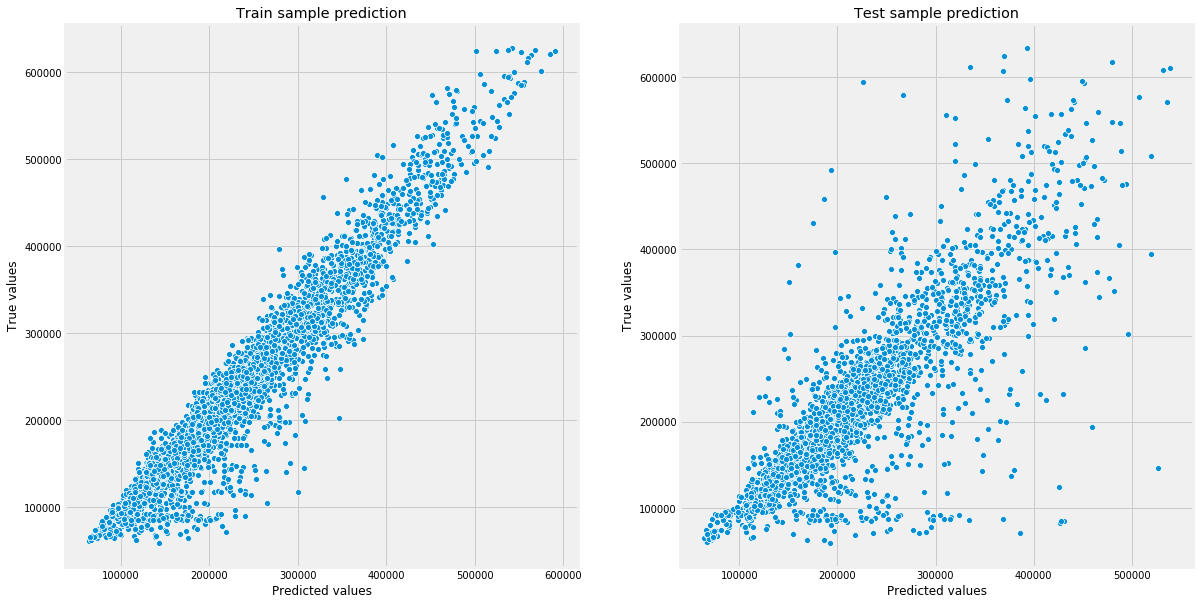

In [84]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [85]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(shuffle=True, random_state=33))
cv_score.mean()

0.7188198454699638

In [86]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by = 'importance', ascending = False)

,feature_name,importance
2,Square,0.352536
1,Rooms,0.103695
11,S2,0.099855
12,S1,0.089987
13,S3,0.067999
0,DistrictId,0.049536
3,LifeSquare,0.042371
7,HouseYear,0.037887
9,Healthcare_1,0.026518
14,E1,0.026205


In [56]:
y_validate_preds = rf_model.predict(X_validate)

In [57]:
answer = pd.concat([test_df['Id'], pd.DataFrame({'Price': y_validate_preds})], axis=1)

In [58]:
answer.shape

(5000, 2)

In [59]:
answer.to_csv(path_or_buf='C:/Users/dmitriy.ivanov/Documents/GitHub/Geekbrains_DB_0607/Data Science/Final/DmitriyIvanov_pred.csv', index=False)